In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv("card_transdata.csv")
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [17]:
dataset.keys()

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

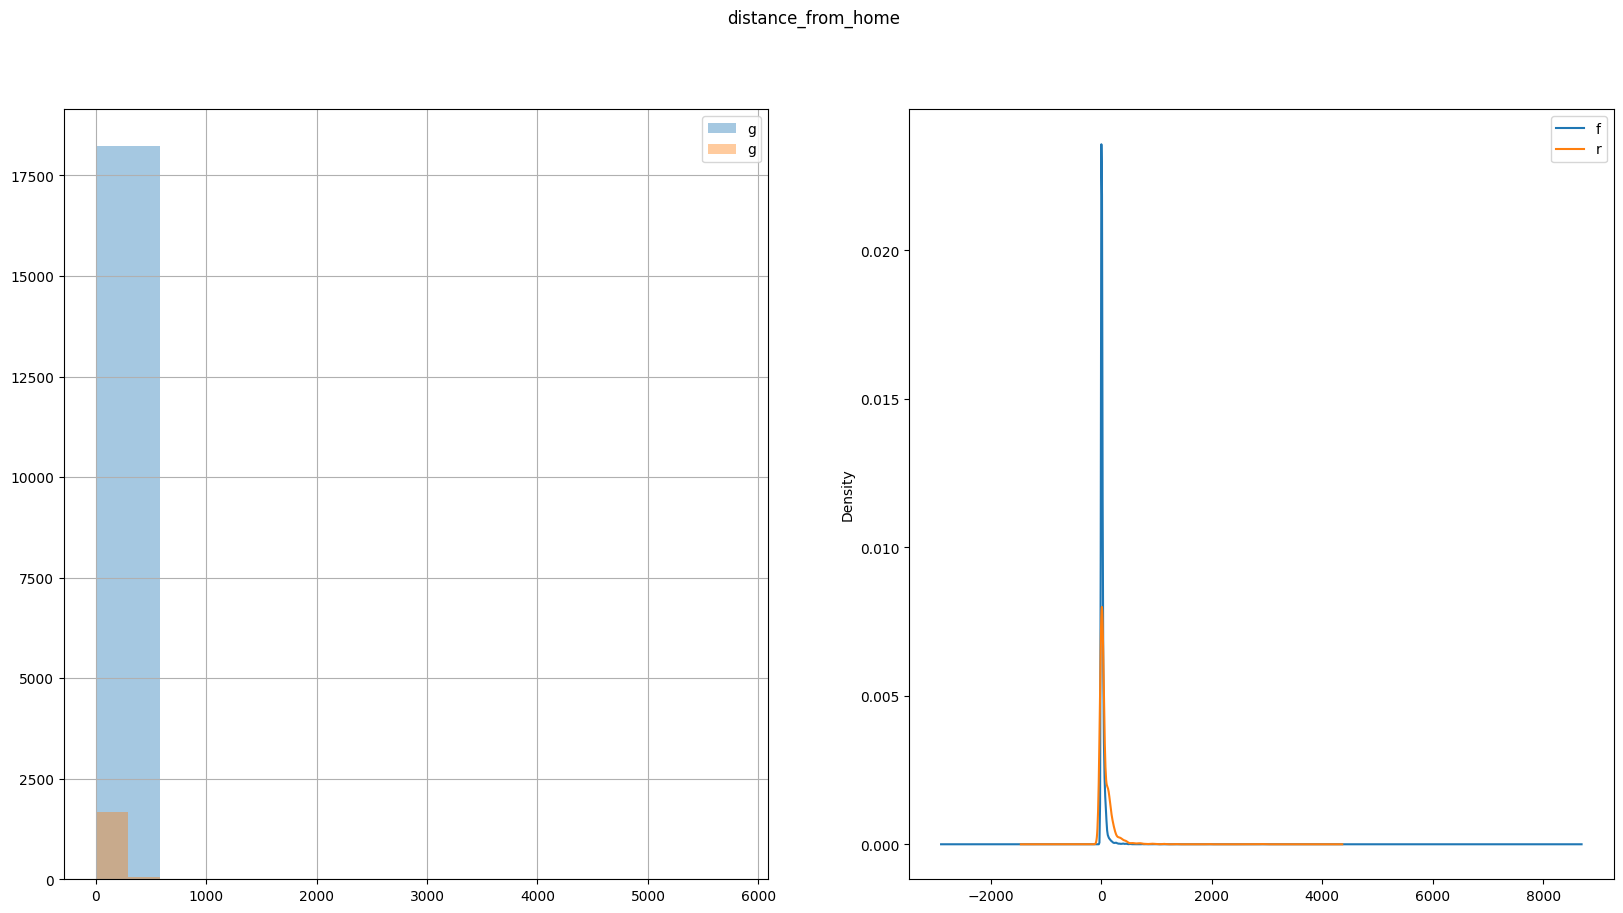

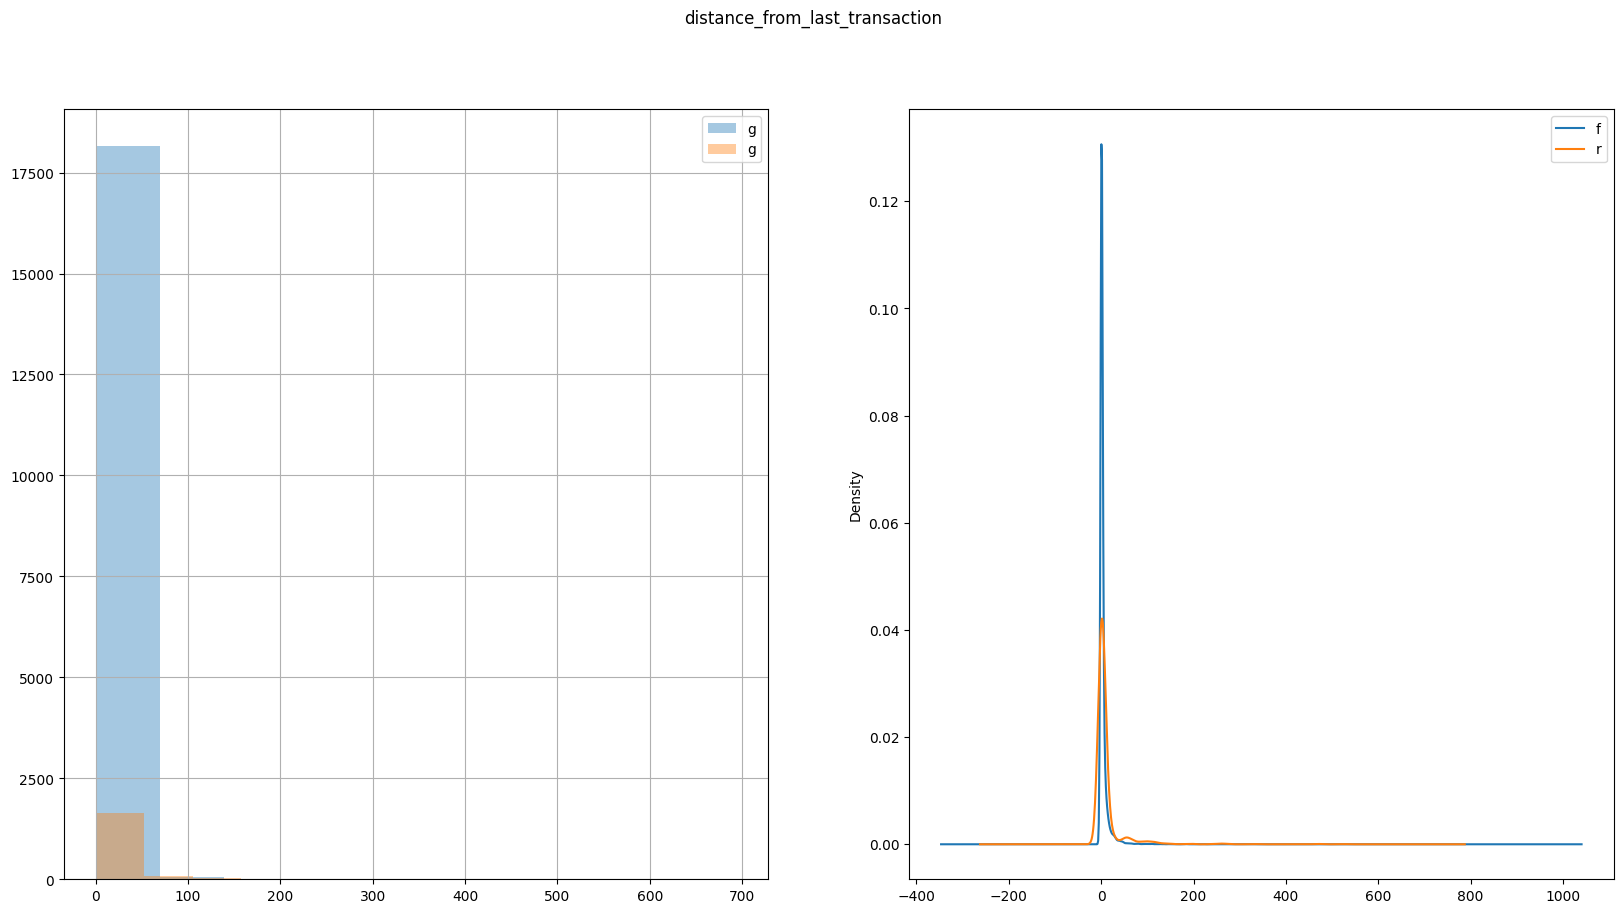

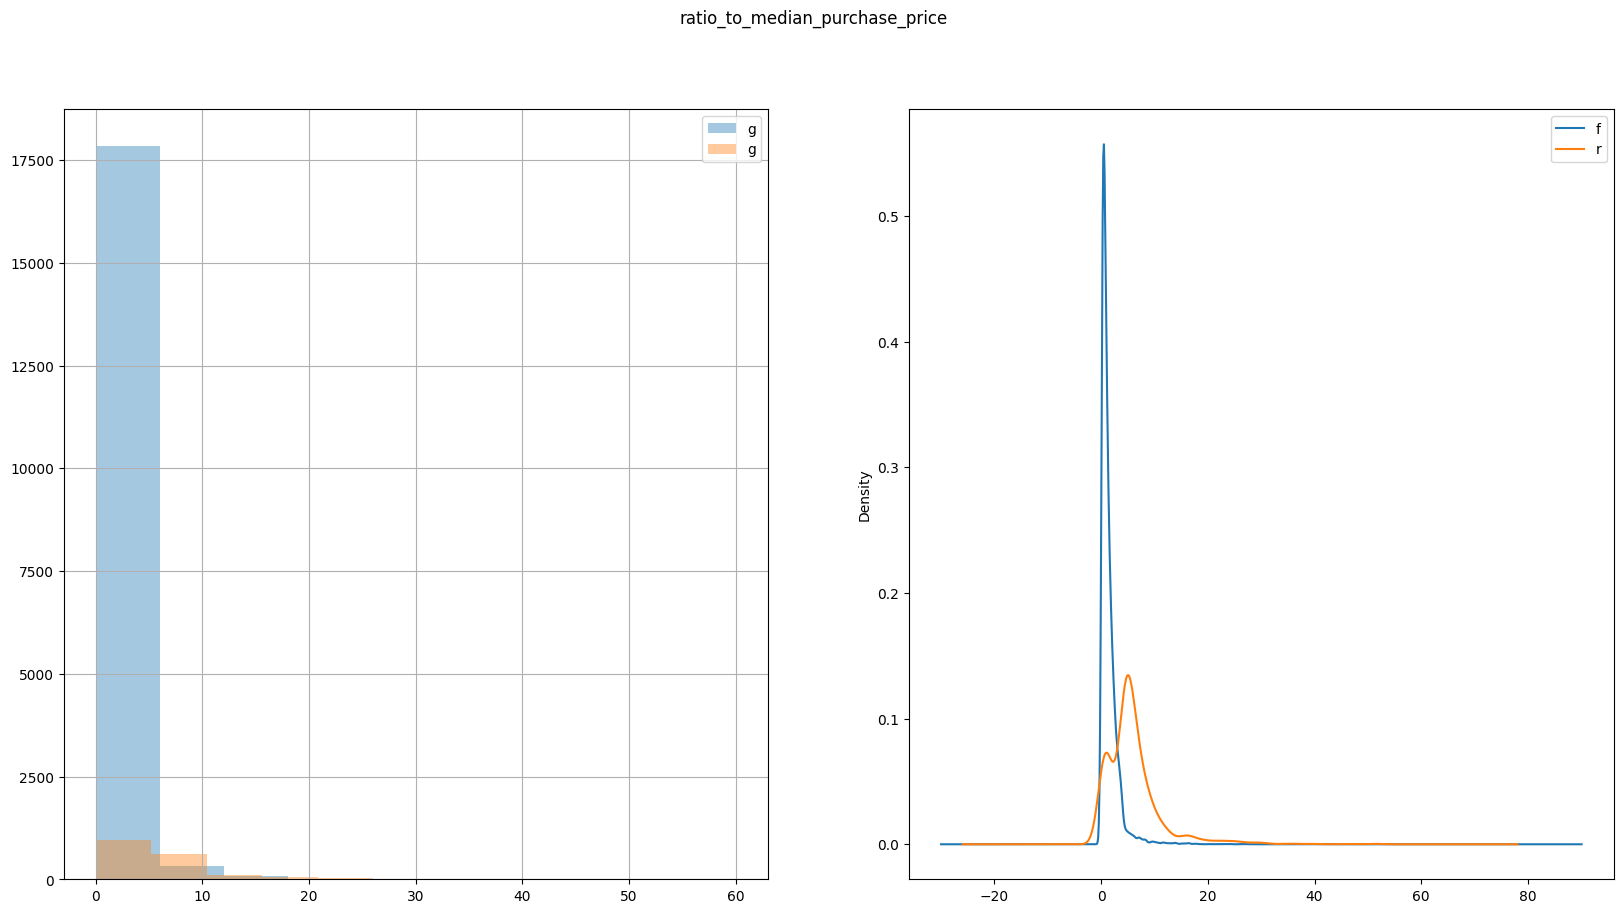

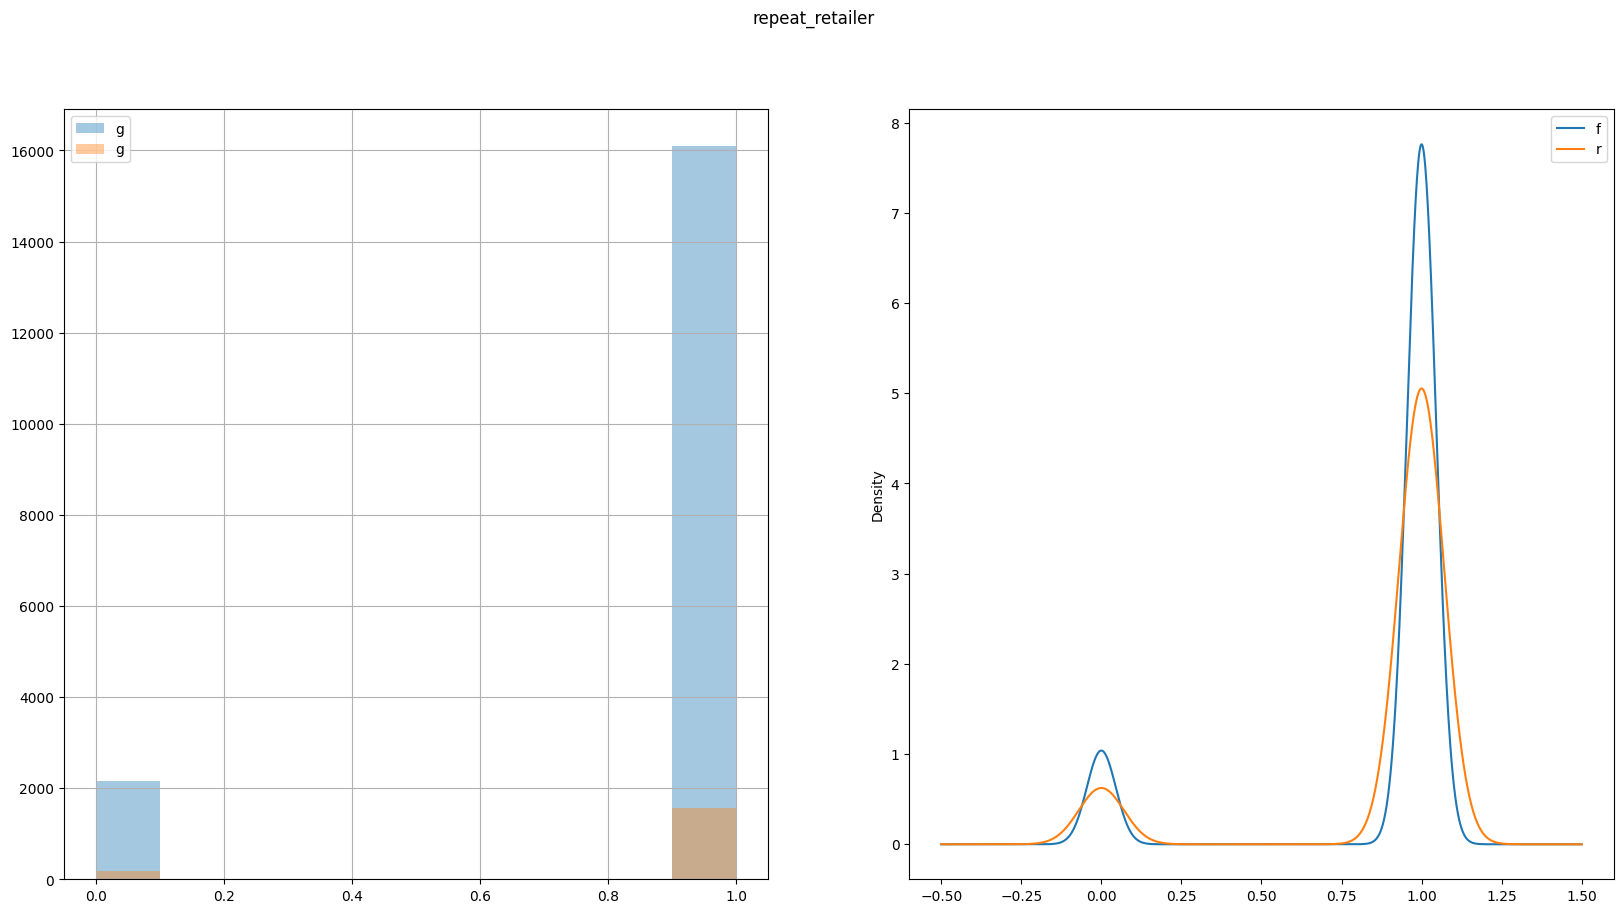

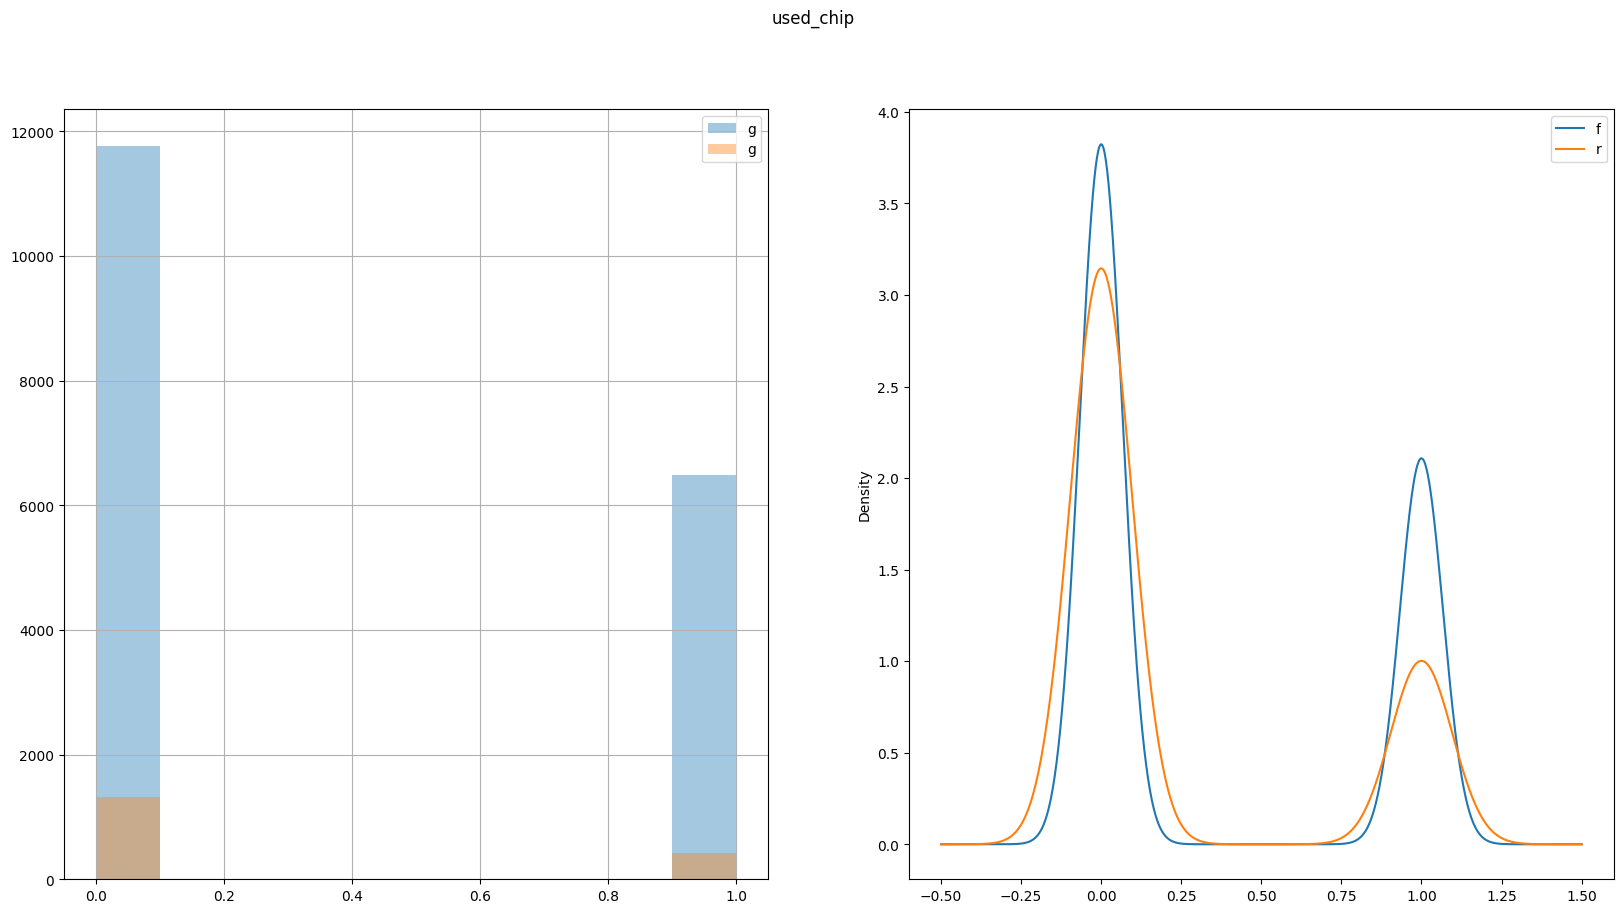

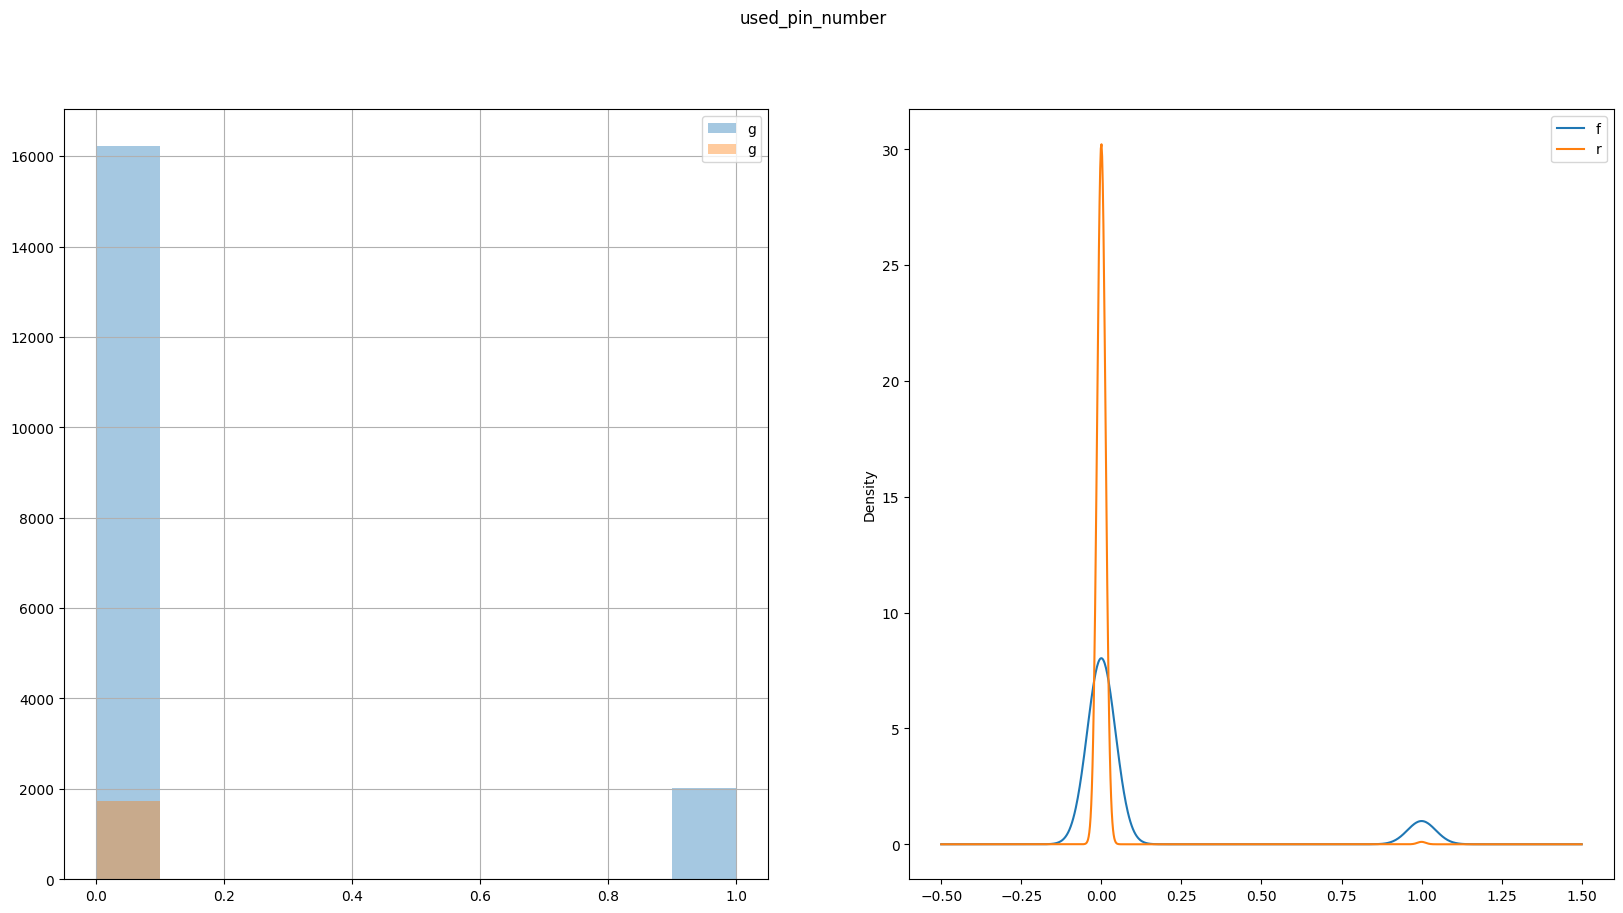

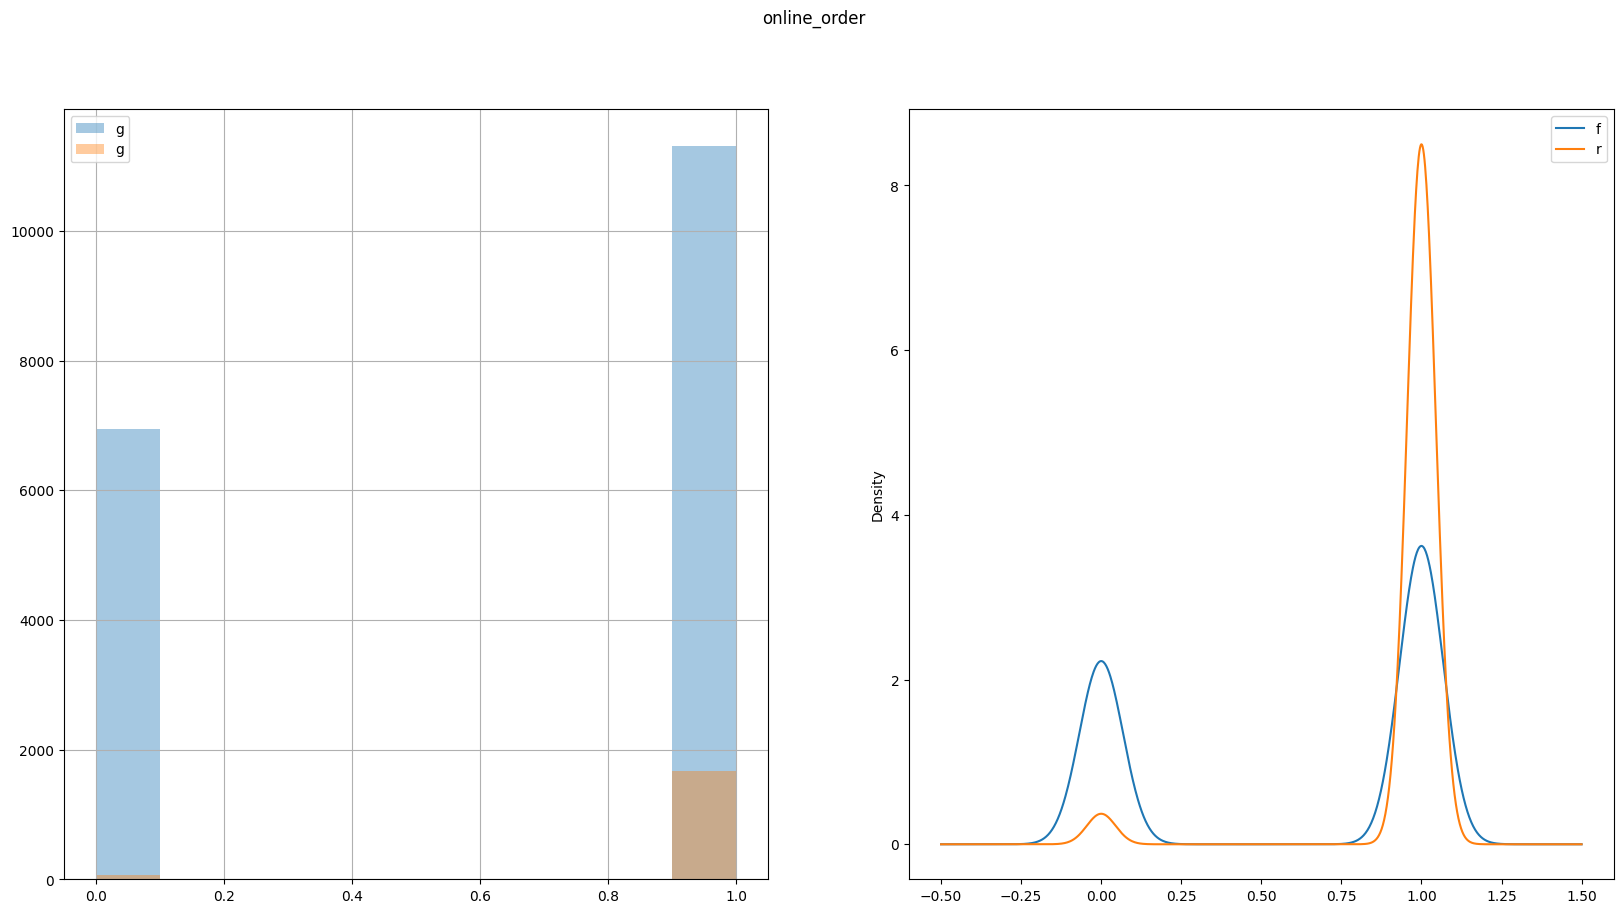

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, train_size=0.02, random_state=12)

color = ['red' if l == 0 else 'blue' for l in train["fraud"]]
for feature in dataset.loc[:, dataset.columns != 'fraud']:
    fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
    fig.suptitle(feature)

    dataset.groupby(by=train["fraud"])[feature].hist(alpha=0.4, ax=axs[0])
    dataset.groupby(by=train["fraud"])[feature].plot(kind='kde', ax=axs[1])
    axs[1].legend("fraud")
    axs[0].legend("")